#Project "Inequality and Growth"

In [2]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import plotly
import plotly.express as px

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

#Inequality

In [3]:
df_inequality = pd.read_csv('inequality.csv')
print(f'DataFame shape: {df_inequality.shape}')

DataFame shape: (3096, 114)


In [ ]:
df_inequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9927 entries, 0 to 9926
Columns: 114 entries, Country to headcount_ratio_60_median_posttax_nat
dtypes: float64(112), int64(1), object(1)
memory usage: 8.6+ MB


>Для начала создадим список названий нужных нам колонок, и если в них есть строки, где в какой-то колонке нет данных, удалим эту строку. Проверим первые 10 строк.

In [4]:
useful_cols = ['Country', 'Year', 'Gini coefficient (before tax) (World Inequality Database)', 'Income share of the richest 10% (before tax) (World Inequality Database)',
               'Income share of the richest 1% (before tax) (World Inequality Database)', 'Income share of the richest 0.1% (before tax) (World Inequality Database)', 'Income share of the poorest 50% (before tax) (World Inequality Database)',
               'Palma ratio (before tax) (World Inequality Database)'
              ]
df1 = df_inequality[useful_cols].dropna()
df1.head(10)

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database)
28,Afghanistan,2008,0.524524,41.940002,16.220001,5.66,17.16,3.701677
32,Afghanistan,2012,0.492656,38.760002,13.820000,4.54,19.00,3.030492
37,Afghanistan,2017,0.515393,41.010002,15.080001,5.02,17.79,3.417500
42,Africa (WID),1980,0.702044,58.560000,21.830000,7.12,7.38,13.843971
43,Africa (WID),1981,0.697559,57.980000,21.510000,6.75,7.56,13.267735
44,Africa (WID),1982,0.696377,57.880000,21.529999,6.80,7.63,13.065463
45,Africa (WID),1983,0.698333,58.079998,21.570000,6.73,7.52,13.260274
46,Africa (WID),1984,0.701148,58.190000,21.560000,6.62,7.30,13.724056
47,Africa (WID),1985,0.700311,58.120000,21.590000,6.73,7.34,13.675294
48,Africa (WID),1986,0.695608,57.460000,21.050000,6.51,7.48,13.239632


> Теперь отсортируем наши строки в возрастающем порядке по значению коэффициента Джини, который изменяется от 0 до 1. Потом сортировать будем в алфавитном порядке по стране.

> Значение коэффицента Джини: чем больше его значение отклоняется от нуля и приближается к единице, тем в большей степени доходы сконцентрированы в руках отдельных групп населения.

In [ ]:
sorted_data = df1.sort_values(by=["Gini coefficient (before tax) (World Inequality Database)", "Country"], ascending=True)

sorted_data.head(10)

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database)
3779,Hungary,1985,0.211302,16.840000,2.86,0.47,36.500000,0.645953
3778,Hungary,1984,0.211365,16.689999,2.79,0.44,36.469997,0.642912
3780,Hungary,1986,0.216642,17.080000,2.95,0.49,36.110000,0.666407
3777,Hungary,1983,0.227406,17.270000,2.80,0.42,35.100002,0.696933
3781,Hungary,1987,0.230995,18.060000,3.41,0.62,35.120003,0.727639
1786,China (urban),1978,0.238418,21.840000,4.87,1.87,34.800000,0.832000
1787,China (urban),1979,0.239972,21.940000,4.93,1.90,34.710000,0.838365
1788,China (urban),1980,0.241512,22.040000,4.99,1.93,34.610000,0.844768
1790,China (urban),1982,0.242393,22.140000,5.15,2.01,34.540000,0.849578
3776,Hungary,1982,0.242577,17.890000,2.82,0.40,33.860000,0.751681


> Создадим список ненужных нам значений в колонке стран, так как это определенные области мира и нам будет неудобно сравнивать страны

In [ ]:
not_useful = ['Africa (WID)', 'Asia (WID)', 'Asia (excluding Middle East) (WID)', 'Central Asia (WID)','China (rural)','East Africa (WID)',
              'East Asia (WID)', 'Eastern Europe (WID)','Europe (WID)','European Union (WID)', 'Latin America (WID)','MENA (WID)',
              'Middle Africa (WID)', 'Middle East (WID)', 'North Africa (WID)', 'North America and Oceania (WID)','Oceania (WID)',
              'Other East Asia (WID)','Other Latin America (WID)','Other MENA (WID)', 'Other North America and Oceania (WID)',
              'Other Russia and Central Asia (WID)', 'Other South & South-East Asia (WID)', 'Other Sub-Saharan Africa (WID)',
              'Other Western Europe (WID)', 'Russia and Central Asia (WID)','South & South-East Asia (WID)',
              'South Africa', 'South Africa region (WID)', 'South-East Asia (WID)','West Africa (WID)', 'West Asia (WID)',
              'Western Europe (WID)','World','North America (WID)','South Asia (WID)','Sub-Saharan Africa (WID)'
]

> Составим новую таблицу с тремя необходимымии столбцами и удалим строки, если в них нет информации по этим значениям. Потом удалим все области и оставим только страны. Дальше будем сравнивать отдельные страны по коэффиценту Джини за 2018 год, так как это ближайщий год с наиболее полной информацией.

In [ ]:
useful_cols1 = ['Country', 'Year','Gini coefficient (before tax) (World Inequality Database)']
data = df_inequality[useful_cols1].dropna()

data = data[~data['Country'].isin(not_useful)]
data = data[data['Year'].isin([2018])]
useful_cols2 = ['Country','Gini coefficient (before tax) (World Inequality Database)']
data = data[useful_cols2]
data.head(10)

,Country,Gini coefficient (before tax) (World Inequality Database)
122,Albania,0.491266
217,Angola,0.685597
270,Argentina,0.586630
312,Armenia,0.539864
511,Australia,0.479725
763,Belarus,0.428858
1110,Brazil,0.680899
1194,Bulgaria,0.547217
1469,Canada,0.524866
1689,Chile,0.728013


> Создадим новую строку с данными по миру

In [ ]:
world = {'Country': 'World','Gini coefficient (before tax) (World Inequality Database)': 0.66746974}

> Покажем на графике страны с возрастающим коэффицентом Джини и сравним со значением по миру.

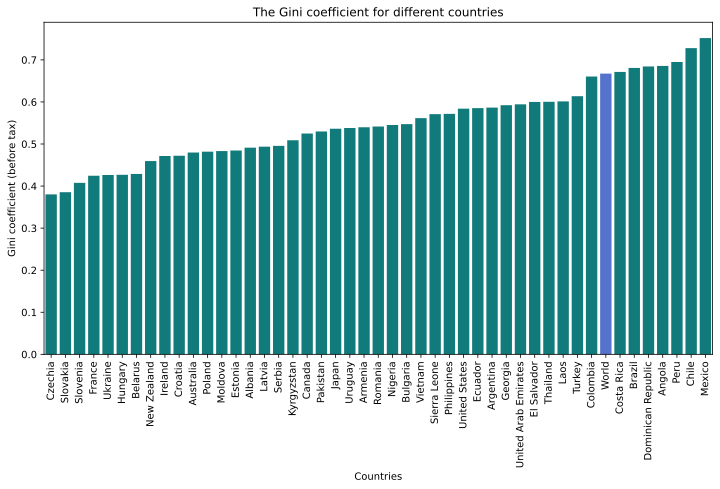

In [ ]:
com_world = data.append(world, ignore_index=True)
com_world = com_world.sort_values(by=["Gini coefficient (before tax) (World Inequality Database)", "Country"], ascending=True)
plt.figure(figsize=(12, 6))
colors = ['royalblue' if country == 'World' else 'darkcyan' for country in com_world['Country']]

com_world = sns.barplot(com_world, x='Country', y='Gini coefficient (before tax) (World Inequality Database)', palette=colors)

plt.ylabel('Gini coefficient (before tax)')
plt.xlabel('Countries')
plt.title('The Gini coefficient for different countries')
plt.xticks(rotation=90)


plt.show()

> Теперь сравним случайнно выбранные 30 стран и потом сопоставим с показателем по миру.

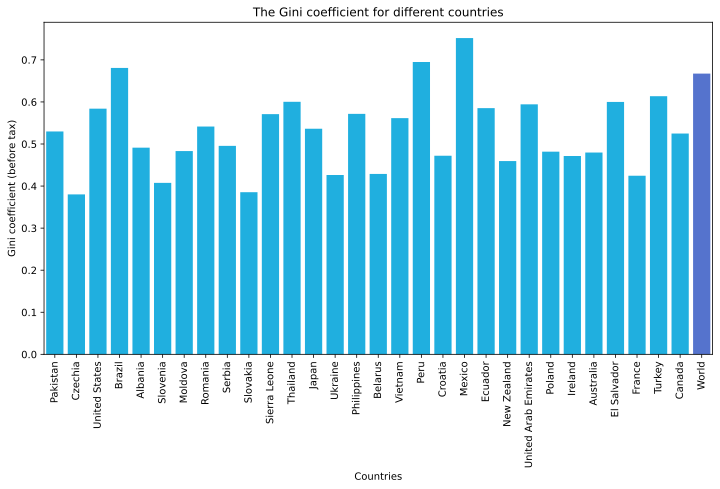

In [ ]:
data_random = data.sample(n=30)
com_world1 = data_random.append(world, ignore_index=True)
plt.figure(figsize=(12, 6))

colors = ['royalblue' if country == 'World' else 'deepskyblue' for country in com_world1['Country']]

com_world1 = sns.barplot(com_world1, x='Country', y='Gini coefficient (before tax) (World Inequality Database)', palette=colors)

plt.ylabel('Gini coefficient (before tax)')
plt.xlabel('Countries')
plt.title('The Gini coefficient for different countries')
plt.xticks(rotation=90)


plt.show()

> Рассмотрим изменения коэффицента Джини во времени, например, для России и всего мира и представим на одном графике.

In [ ]:
rus_data = df_inequality[useful_cols1].dropna()
rus_data = rus_data[rus_data['Country'].isin(['Russia'])]
useful_cols3 = ['Year', 'Gini coefficient (before tax) (World Inequality Database)']

rus_data = rus_data[useful_cols3]

In [ ]:
world_data = df_inequality[useful_cols1].dropna()
world_data = world_data[world_data['Country'].isin(['World'])]
useful_cols3 = ['Year', 'Gini coefficient (before tax) (World Inequality Database)']

world_data = world_data[useful_cols3]

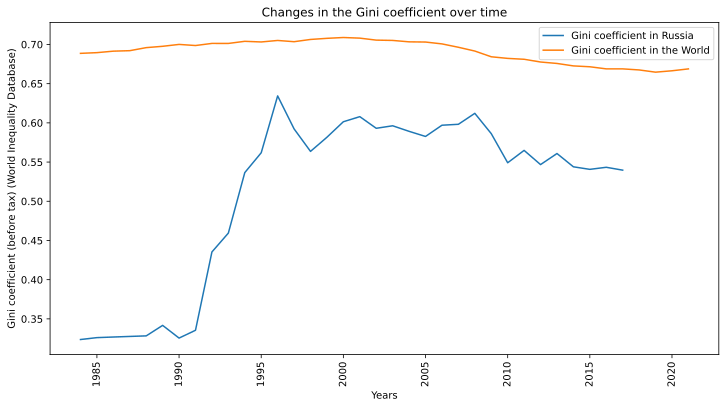

In [ ]:
cols = rus_data.columns.tolist()
cols1 = world_data.columns.tolist()
plt.figure(figsize=(12, 6))
plt.plot(rus_data[15:][cols[0]], rus_data[15:][cols[1]], label='Gini coefficient in Russia')


plt.plot(world_data[4:][cols1[0]], world_data[4:][cols1[1]], label='Gini coefficient in the World')


plt.ylabel('Gini coefficient (before tax) (World Inequality Database)')
plt.xlabel('Years')


plt.legend()


plt.xticks(rotation=90)
plt.title('Changes in the Gini coefficient over time')

plt.show()

#Growth

In [5]:
df_growth = pd.read_csv('gdp-per-capita-penn-world-table.csv')
print(f'DataFame shape: {df_growth.shape}')

DataFame shape: (10108, 4)


In [ ]:
df_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              10108 non-null  object 
 1   Code                                                10108 non-null  object 
 2   Year                                                10108 non-null  int64  
 3   GDP per capita (output, multiple price benchmarks)  10108 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 316.0+ KB


>В данной датафрейме весго 4 столбца, причем информация в каждом из них важна для анализ, поэтому в данном случае не будем удалять никакие колонки.

In [6]:
df2 = df_growth.dropna()
df2 = df2.rename(columns={'Entity': 'Country'}) #Переименуем колонку, чтобы было нагляднее и красивее
df_growth.head()

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


>Теперь отсортируем наши строки в возрастающем порядке по значению GDP. Потом сортировать будем по году, а затем в алфавитном порядке по стране.

>GDP (Gross Domestic Product) — это общая стоимость всех произведенных товаров и услуг в определенной стране за определенный период времени. Он является одним из основных показателей экономического развития страны и имеет прямое влияние на уровень жизни населения. \
Чем выше уровень GDP, тем больше денег общество имеет для инвестиций в образование, здравоохранение, социальную защиту и другие общественные блага.

In [ ]:
sorted_data = df2.sort_values(by=["GDP per capita (output, multiple price benchmarks)", "Year", "Country"], ascending=False)

sorted_data.head(10)

,Country,Code,Year,"GDP per capita (output, multiple price benchmarks)"
7659,Qatar,QAT,2012,169200.27
7658,Qatar,QAT,2011,167820.64
7660,Qatar,QAT,2013,164968.48
7655,Qatar,QAT,2008,161521.75
7661,Qatar,QAT,2014,147262.56
5622,Macao,MAC,2014,145062.58
9583,United Arab Emirates,ARE,1990,144841.36
5620,Macao,MAC,2012,144189.69
5621,Macao,MAC,2013,143194.12
5160,Kuwait,KWT,1970,141652.17


>Посмотрим, как изменялось среднее значение GDP по всем странам с течением времени:

In [ ]:
gdp_time = df2.groupby("Year").agg({'GDP per capita (output, multiple price benchmarks)': 'mean'}).reset_index()
gdp_time.head()

,Year,"GDP per capita (output, multiple price benchmarks)"
0,1950,5477.212984
1,1951,5452.159208
2,1952,5467.860432
3,1953,5503.166328
4,1954,5519.754134


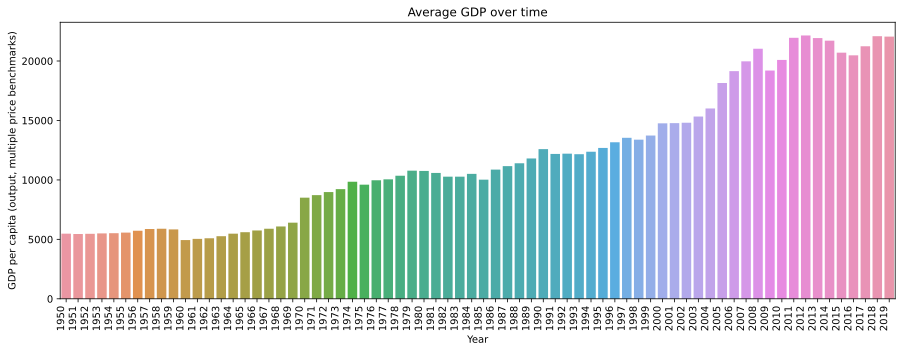

In [ ]:
plt.figure(figsize=(15, 5))

plot_gdp_time = sns.barplot(data=gdp_time, x='Year', y='GDP per capita (output, multiple price benchmarks)')
plot_gdp_time.set_title('Average GDP over time')
plt.xticks(rotation=90, ha='right')

plt.show()

>А теперь посмотрим на среднее значение GDP по странам за все годы с 1950 по 2019:

In [ ]:
gdp_mean = df2.groupby("Country").agg({'GDP per capita (output, multiple price benchmarks)': 'mean'}).reset_index()
gdp_mean.head()

,Country,"GDP per capita (output, multiple price benchmarks)"
0,Albania,5946.504235
1,Algeria,10453.508448
2,Angola,4492.325232
3,Anguilla,21180.396160
4,Antigua and Barbuda,12641.175728


>Добавим в таблицу среднее значение по миру

In [ ]:
gdp_world_val = df2['GDP per capita (output, multiple price benchmarks)'].mean()
gdp_world_val

13121.751930901266

In [ ]:
gdp_mean.loc[len(gdp_mean.index)] = ['World', gdp_world_val]

In [ ]:
gdp_mean = gdp_mean.sort_values(by=['GDP per capita (output, multiple price benchmarks)'], ascending=False).reset_index()

>Выделим на графике среднее значение по миру отдельным цветом

In [ ]:
palette = sns.color_palette("hls", len(gdp_mean))
cols = ['#0A122A' if gdp_mean.Country[i] == 'World' else palette[i] for i in range(len(gdp_mean))]

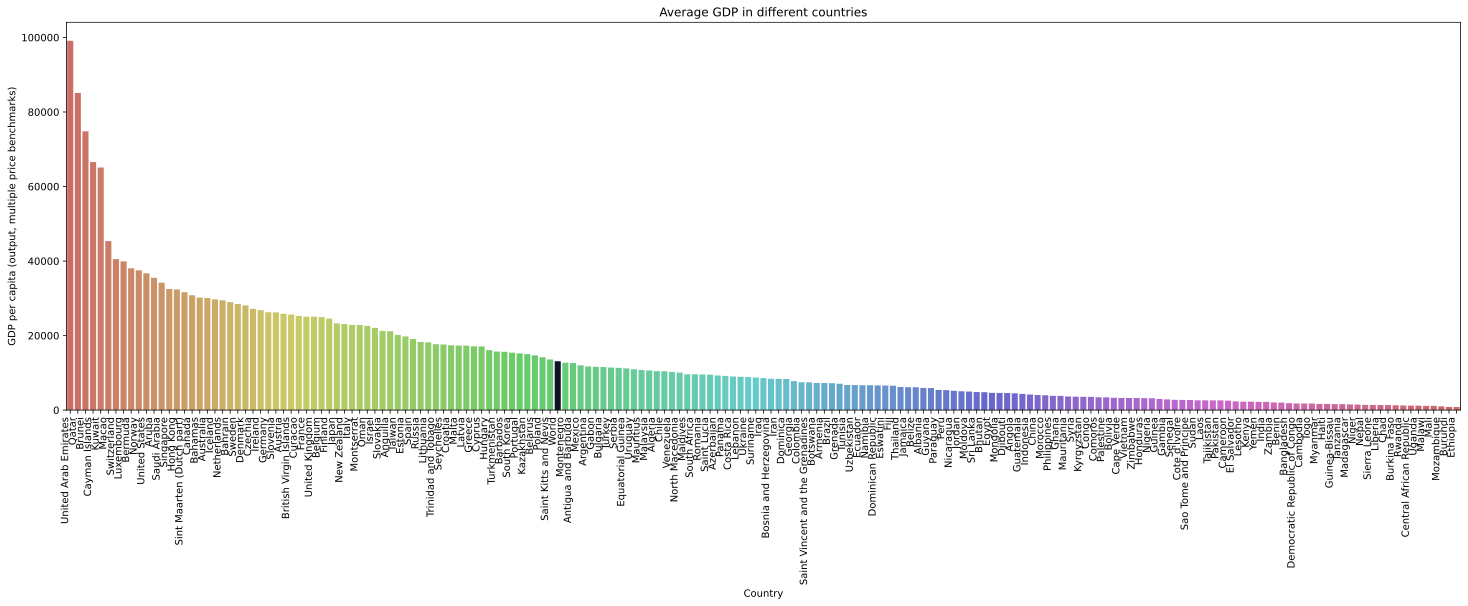

In [ ]:
plt.figure(figsize=(25, 7))

plot_gdp_mean = sns.barplot(data=gdp_mean, x='Country', y='GDP per capita (output, multiple price benchmarks)', palette = cols)
plot_gdp_mean.set_title('Average GDP in different countries')
plt.xticks(rotation=90, ha='right')

plt.show()

>А теперь равним значение GDP по России и всем остальным странам с течением времени

In [ ]:
gdp_rus = df2[df2.Country == 'Russia']
gdp_rus.head()

,Country,Code,Year,"GDP per capita (output, multiple price benchmarks)"
7727,Russia,RUS,1990,16903.906
7728,Russia,RUS,1991,16476.445
7729,Russia,RUS,1992,15203.168
7730,Russia,RUS,1993,13039.194
7731,Russia,RUS,1994,11089.198


In [ ]:
gdp_not_rus = df2[df2.Country != 'Russia']
gdp_not_rus = gdp_not_rus.groupby('Year').agg({'GDP per capita (output, multiple price benchmarks)': 'mean'}).reset_index()
gdp_not_rus.head()

,Year,"GDP per capita (output, multiple price benchmarks)"
0,1950,5477.212984
1,1951,5452.159208
2,1952,5467.860432
3,1953,5503.166328
4,1954,5519.754134


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=gdp_rus['Year'], y=gdp_rus['GDP per capita (output, multiple price benchmarks)'], name = 'Russia', line=dict(color='#0A2438')))

fig.add_trace(go.Scatter(x=gdp_not_rus['Year'], y=gdp_not_rus['GDP per capita (output, multiple price benchmarks)'], name = 'Other countries', line=dict(color='#7692FF')))

fig.update_layout(title_text = "Average GDP", title_x=0.5)
fig.update_xaxes(title_text = "Year")
fig.update_yaxes(title_text = "GDP")

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

#Linear regression

>Объединим две имеющиеся таблицы (Inequality и Growth) по общим столбцам (Country и Year) для построения линейной регрессии.

In [8]:
merged_table = pd.merge(df1, df2, on=['Country', 'Year'])
merged_table.head()

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),Code,"GDP per capita (output, multiple price benchmarks)"
0,Albania,1996,0.467630,32.57,8.14,2.04,18.800000,2.788527,ALB,4862.4824
1,Albania,2002,0.481698,33.64,8.63,2.21,17.960000,3.047102,ALB,5636.1846
2,Albania,2005,0.474482,33.12,8.42,2.14,18.430000,2.907814,ALB,6531.7970
3,Albania,2008,0.472132,33.07,8.58,2.22,18.590000,2.853322,ALB,8615.2400
4,Albania,2012,0.467515,33.00,8.55,2.21,19.050001,2.761506,ALB,11106.7690


>Посмотрим сводную информацию по таблице:

In [18]:
merged_table.describe()

,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),"GDP per capita (output, multiple price benchmarks)"
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,2000.787879,0.519790,40.012466,13.222534,4.142011,16.867810,4.859941,19655.537862
std,14.704601,0.100023,10.592057,5.589703,2.283189,5.090142,3.929171,14414.699332
min,1950.000000,0.294832,17.520000,2.050000,0.230000,4.880000,0.905426,604.623600
25%,1994.000000,0.445470,32.415000,9.042500,2.602500,13.510001,2.413904,8693.780750
50%,2005.000000,0.492720,36.554998,11.760000,3.715000,17.560001,3.162676,15904.469500
75%,2012.000000,0.587062,47.547500,16.357500,5.127500,20.125000,5.413132,28580.562750
max,2019.000000,0.781373,69.580000,36.079998,22.160000,28.520000,23.427608,101071.700000


>Построим корреляционную таблицу:

In [19]:
corr = merged_table.corr()
corr.round(2)

,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),"GDP per capita (output, multiple price benchmarks)"
Year,1.00,0.34,0.39,0.40,0.33,-0.26,0.28,0.14
Gini coefficient (before tax) (World Inequality Database),0.34,1.00,0.98,0.89,0.58,-0.98,0.91,-0.43
Income share of the richest 10% (before tax) (World Inequality Database),0.39,0.98,1.00,0.93,0.64,-0.92,0.88,-0.43
Income share of the richest 1% (before tax) (World Inequality Database),0.40,0.89,0.93,1.00,0.84,-0.80,0.81,-0.33
Income share of the richest 0.1% (before tax) (World Inequality Database),0.33,0.58,0.64,0.84,1.00,-0.49,0.51,-0.14
Income share of the poorest 50% (before tax) (World Inequality Database),-0.26,-0.98,-0.92,-0.80,-0.49,1.00,-0.89,0.42
Palma ratio (before tax) (World Inequality Database),0.28,0.91,0.88,0.81,0.51,-0.89,1.00,-0.35
"GDP per capita (output, multiple price benchmarks)",0.14,-0.43,-0.43,-0.33,-0.14,0.42,-0.35,1.00


>Визуализируем в более наглядном формате:

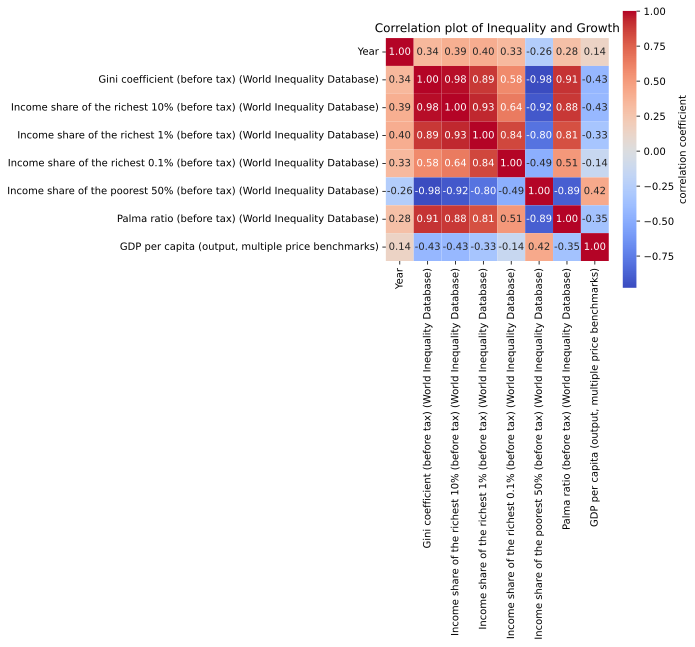

In [16]:
plt.figure(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            cbar_kws = {'label' : 'correlation coefficient'},
            square = True, fmt ='.2f')
plt.title('Correlation plot of Inequality and Growth')
plt.savefig('Correlation plot of Inequality and Growth.pdf', bbox_inches='tight')
plt.show()

>Из таблицы видно, что колонка Gini coefficient (before tax) (World Inequality Database) имеет сильную взаимосвязь со всеми остальными, кроме GDP per capita (output, multiple price benchmarks) => для построения корректной линейной регрессии нужно будет удалить зависимые столбцы

In [ ]:
merged_table = merged_table[['Year', 'Country', 'GDP per capita (output, multiple price benchmarks)', 'Gini coefficient (before tax) (World Inequality Database)']]
merged_table.head()

,Year,Country,"GDP per capita (output, multiple price benchmarks)",Gini coefficient (before tax) (World Inequality Database)
0,1996,Albania,4862.4824,0.467630
1,2002,Albania,5636.1846,0.481698
2,2005,Albania,6531.7970,0.474482
3,2008,Albania,8615.2400,0.472132
4,2012,Albania,11106.7690,0.467515
...,...,...,...,...
1642,2011,Niger,1131.7478,0.532835
1643,2014,Niger,1194.3004,0.545264
1644,2003,Nigeria,1643.9158,0.581982
1645,2009,Nigeria,4471.6770,0.550844


>Теперь построим линейную регрессию:

In [ ]:
target_variable = 'GDP per capita (output, multiple price benchmarks)'

X = merged_table.drop([target_variable, 'Country', 'Year', 'Code'], axis=1) #Удаляем ненужные столбцы (со строковыми типами данных и используемую колонку)
y = merged_table[target_variable]

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.8
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=train_size, random_state=42, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

In [ ]:
import statsmodels.api as sm
#add constant to predictor variables
x_train = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

                                                 OLS Regression Results                                                
Dep. Variable:     GDP per capita (output, multiple price benchmarks)   R-squared (uncentered):                   0.697
Model:                                                            OLS   Adj. R-squared (uncentered):              0.696
Method:                                                 Least Squares   F-statistic:                              503.0
Date:                                                Fri, 10 Nov 2023   Prob (F-statistic):                        0.00
Time:                                                        11:04:26   Log-Likelihood:                         -14459.
No. Observations:                                                1317   AIC:                                  2.893e+04
Df Residuals:                                                    1311   BIC:                                  2.896e+04
Df Model:                               

>Оценим производительность модели, вычислив среднеквадратичную ошибку (MSE) и коэффициент детерминации на тестовом наборе данных

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)

209284142.854238

In [ ]:
r2_score(y_test, y_pred)

0.14515538264179872